**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

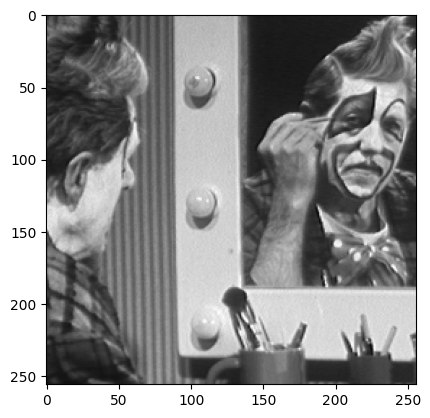

In [4]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [20]:
def convolution(mat1, mat2):
    return np.sum(mat1 * mat2)

def applyFilter(img, mask):
    varX = int( (mask.shape[0])/2 )
    varY = int( (mask.shape[1])/2 )
    newImg = np.zeros((img.shape[0]-2*varX, img.shape[1]-2*varY))
    for i in range(varX,img.shape[0]-varX):
        for j in range(varY,img.shape[1]-varY):
            newImg[i-varX,j-varY] = convolution(img[i-varX:i-varX+mask.shape[0],
                                                    j-varY:j-varY+mask.shape[1]], mask )
    return newImg

In [33]:
#mask = np.array([[-1, 2, -1],[0, 0, 0],[1, 2, 1]])
maskX = np.array([[0, 1],[-1, 0]])
rest00 = applyFilter(img1, maskX)
rest1 = rest00 * rest00

maskY = np.array([[1, 0],[0, -1]])
rest01 = applyFilter(img1, maskY)
rest2 = rest01 * rest01

rest3 = np.sqrt(rest1 + rest2)

<Figure size 640x480 with 0 Axes>

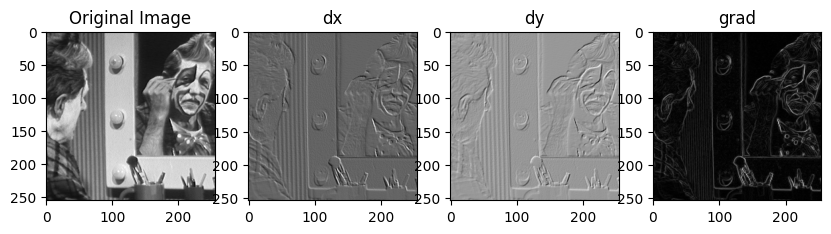

In [34]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(10,7))
#σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).
axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow( rest00, cmap='gray')
axarr[2].imshow( rest01, cmap='gray')
axarr[3].imshow( rest3, cmap='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('dx')
axarr[2].set_title('dy')
axarr[3].set_title('grad')

plt.show()

In [35]:
maskX = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
rest00 = applyFilter(img1, maskX)
rest1 = rest00 * rest00

maskY = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
rest01 = applyFilter(img1, maskY)
rest2 = rest01 * rest01

rest3 = np.sqrt(rest1 + rest2)

<Figure size 640x480 with 0 Axes>

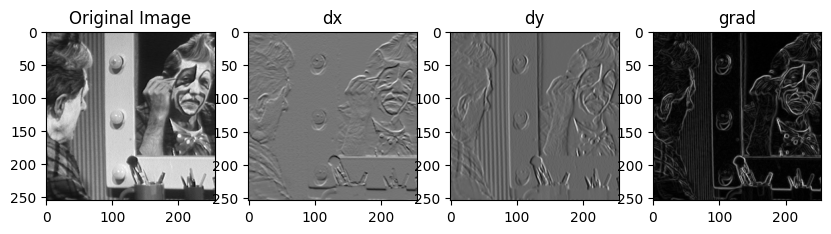

In [36]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(10,7))
#σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).
axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow( rest00, cmap='gray')
axarr[2].imshow( rest01, cmap='gray')
axarr[3].imshow( rest3, cmap='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('dx')
axarr[2].set_title('dy')
axarr[3].set_title('grad')

plt.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

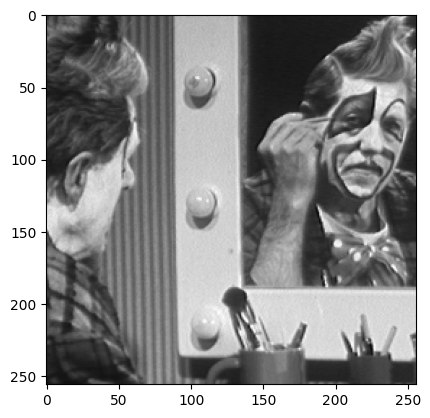

In [37]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [44]:
maskX = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
rest00 = applyFilter(img1, maskX)
img00 = img1[1:img1.shape[0]-1,1:img1.shape[1]-1] + rest00

<Figure size 640x480 with 0 Axes>

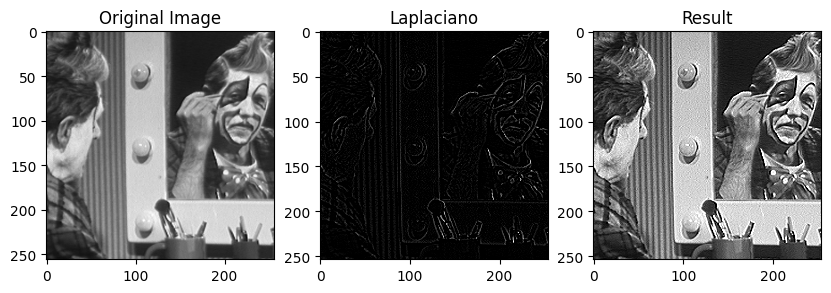

In [47]:
plt.figure()
f, axarr = plt.subplots(1,3, figsize=(10,7))
#σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).
axarr[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[1].imshow( rest00, cmap='gray', vmin=0, vmax=255)
axarr[2].imshow( img00, cmap='gray', vmin=0, vmax=255)

axarr[0].set_title('Original Image')
axarr[1].set_title('Laplaciano')
axarr[2].set_title('Result')

plt.show()

In [52]:
def realcefilter(img, mask, k=1):
    rest00 = applyFilter(img, mask)
    g_mask = img[1:img.shape[0]-1,1:img.shape[1]-1] - rest00
    return img[1:img1.shape[0]-1,1:img1.shape[1]-1] + k*g_mask

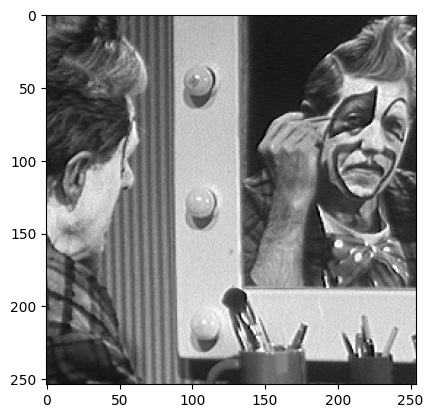

In [54]:
maskX = (1/8)*np.array([[0, 1, 0],[1, 4, 1],[0, 1, 0]])

g = realcefilter(img1, maskX, 1.5)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)

<Figure size 640x480 with 0 Axes>

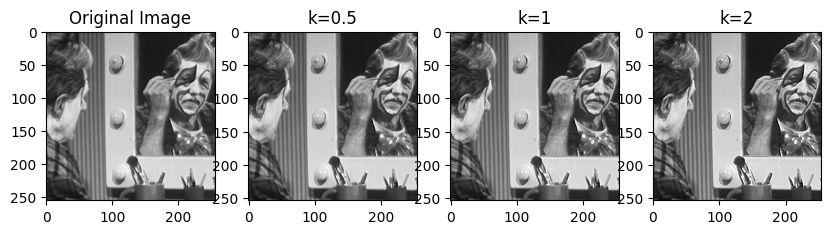

In [56]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(10,7))
#σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).
axarr[0].imshow( img1, cmap='gray', vmin=0, vmax=255)
axarr[1].imshow( realcefilter(img1, maskX, 0.5), cmap='gray', vmin=0, vmax=255)
axarr[2].imshow( realcefilter(img1, maskX, 1), cmap='gray', vmin=0, vmax=255)
axarr[3].imshow( realcefilter(img1, maskX, 2), cmap='gray', vmin=0, vmax=255)

axarr[0].set_title('Original Image')
axarr[1].set_title('k=0.5')
axarr[2].set_title('k=1')
axarr[3].set_title('k=2')

plt.show()

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

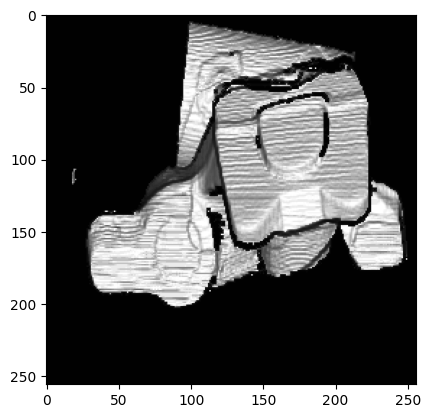

In [57]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


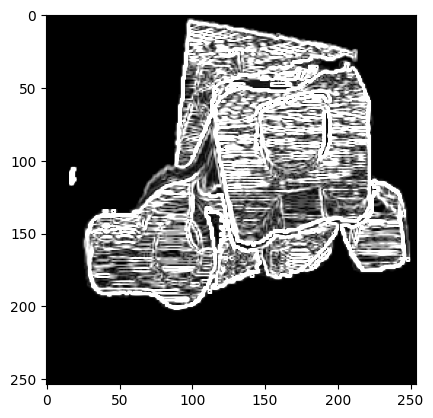

In [58]:
maskX = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
rest00 = applyFilter(img1, maskX)
rest1 = rest00 * rest00

maskY = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
rest01 = applyFilter(img1, maskY)
rest2 = rest01 * rest01

rest3 = np.sqrt(rest1 + rest2)
plt.imshow(rest3, cmap='gray', vmin=0, vmax=255);

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

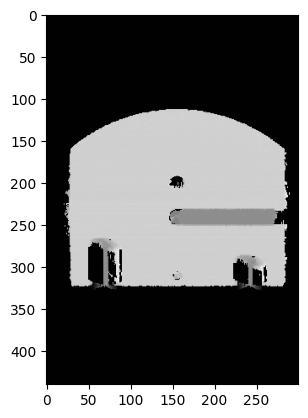

In [59]:

#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

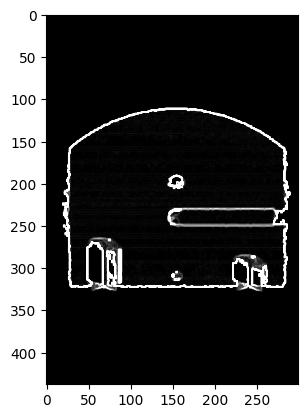

In [60]:
maskX = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
rest00 = applyFilter(img1, maskX)
rest1 = rest00 * rest00

maskY = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
rest01 = applyFilter(img1, maskY)
rest2 = rest01 * rest01

rest3 = np.sqrt(rest1 + rest2)
plt.imshow(rest3, cmap='gray', vmin=0, vmax=255);

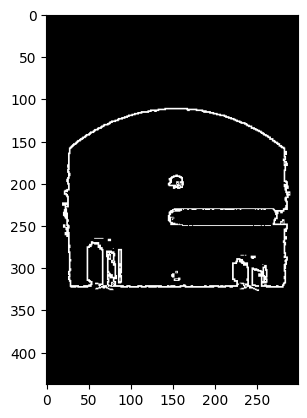

In [61]:
rest4 = (rest3 > 150)*255
plt.imshow(rest4, cmap='gray', vmin=0, vmax=255);

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

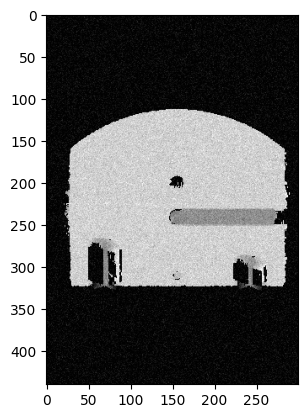

In [62]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

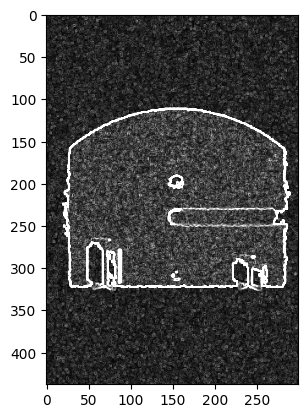

In [63]:
maskX = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
rest00 = applyFilter(img1, maskX)
rest1 = rest00 * rest00

maskY = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
rest01 = applyFilter(img1, maskY)
rest2 = rest01 * rest01

rest3 = np.sqrt(rest1 + rest2)
plt.imshow(rest3, cmap='gray', vmin=0, vmax=255);

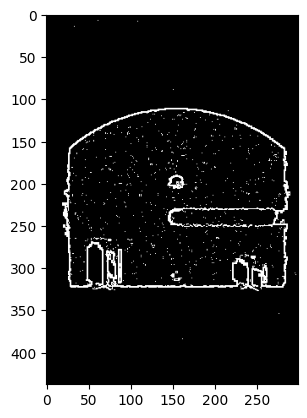

In [64]:
rest4 = (rest3 > 150)*255
plt.imshow(rest4, cmap='gray', vmin=0, vmax=255);